# Vader

In [2]:
!pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 6.1 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
vader_obj = SentimentIntensityAnalyzer()

## load data

In [4]:
import pandas as pd
file_path = '/Users/suqiulin/Desktop/plp_practice_proj/sentiment analysis/100k.csv'
df=pd.read_csv(file_path)
df.head()

,author,body,created_utc,id,submission,subreddit,subreddit_id
0,ForeskinStealer420,A combination of (1) and (2) would make you th...,2024-09-14 22:40:45,ln5r3zv,1fgx26q,datascience,t5_2sptq
1,lakeland_nz,4. Shift to something less technically. Becom...,2024-09-14 22:54:52,ln5tqg8,1fgx26q,datascience,t5_2sptq
2,Moscow_Gordon,Maybe look into solution architect positions f...,2024-09-15 00:16:38,ln67tl2,1fgx26q,datascience,t5_2sptq
3,Numerous-Tip-5097,"Hey, I am on the same boat with less experienc...",2024-09-15 01:37:26,ln6jubq,1fgx26q,datascience,t5_2sptq
4,hornswoggle_choco05,I'd probably shake things up and try a new pat...,2024-09-15 01:58:02,ln6mtyc,1fgx26q,datascience,t5_2sptq


## get sentiment

In [5]:
def get_sentiment(text):
    return vader_obj.polarity_scores(text)

In [6]:
df[['neg', 'neu', 'pos', 'compound']] = df['body'].apply(get_sentiment).apply(pd.Series)
df['polarity'] = df['compound'].apply(lambda x: 'pos' if x > 0 else ('neg' if x < 0 else 'neu'))

df.head(5)


,author,body,created_utc,id,submission,subreddit,subreddit_id,neg,neu,pos,compound,polarity
0,ForeskinStealer420,A combination of (1) and (2) would make you th...,2024-09-14 22:40:45,ln5r3zv,1fgx26q,datascience,t5_2sptq,0.000,0.859,0.141,0.8360,pos
1,lakeland_nz,4. Shift to something less technically. Becom...,2024-09-14 22:54:52,ln5tqg8,1fgx26q,datascience,t5_2sptq,0.000,0.954,0.046,0.4019,pos
2,Moscow_Gordon,Maybe look into solution architect positions f...,2024-09-15 00:16:38,ln67tl2,1fgx26q,datascience,t5_2sptq,0.000,0.811,0.189,0.8225,pos
3,Numerous-Tip-5097,"Hey, I am on the same boat with less experienc...",2024-09-15 01:37:26,ln6jubq,1fgx26q,datascience,t5_2sptq,0.041,0.840,0.119,0.8738,pos
4,hornswoggle_choco05,I'd probably shake things up and try a new pat...,2024-09-15 01:58:02,ln6mtyc,1fgx26q,datascience,t5_2sptq,0.057,0.671,0.272,0.7500,pos


In [24]:
df.to_csv('/Users/suqiulin/Desktop/plp_practice_proj/sentiment analysis/sentiment_by_vader.csv', index=False)
print("Sentiment analysis results saved")

Sentiment analysis results saved


In [27]:
!pip install matplotlib
import matplotlib.pyplot as plt

  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 39.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.5/251.5 kB 16.6 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 27.5 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.9/63.9 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.1/104.1 kB 7.9 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.1.1 -> 24.2
[notice] To update, run: pip install --upgrade pip


In [7]:
df['polarity'].value_counts()

polarity
pos    53084
neg    30340
neu    24297
Name: count, dtype: int64

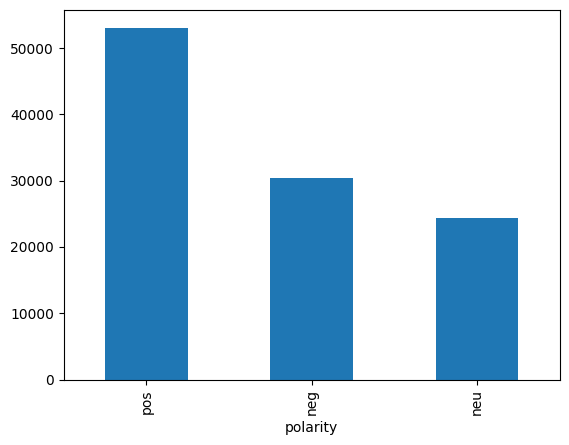

In [28]:
df['polarity'].value_counts().plot(kind='bar')
plt.show()
